# 01_data_summary — Exploratory Data Analysis (EDA)

資料前處理 — 資料探索 (EDA)

本單元對 `uci-secom.csv` 進行初步的資料探索（EDA），涵蓋：
- 基本結構（shape、欄位、型別）
- 缺失值分佈與前處理建議
- 目標變數 `Pass/Fail` 的分布
- 感測器欄位的統計摘要與零變異檢查
- 簡單視覺化（缺失值 Top-N、Pass/Fail 分布、缺失值熱圖、部分感測器分佈）


內容重點：

- 自動偵測並讀取 data/uci-secom.csv（若不存在則 fallback 到上傳路徑）
- 基本結構與欄位型別總覽
- 缺失值比例表、Top-N 缺失欄位長條圖、缺失矩陣熱圖
- Pass/Fail 分布圖（如檢測到該欄）
- 感測器欄位摘要統計、零變異欄位檢查
- 依 Pass/Fail 的群組平均/標準差簡表（Top 影響感測器）
- 後續資料處理與建模建議備忘

In [4]:
# === Imports & Settings ===
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 顯示設定
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 160)

# 圖表內嵌顯示（在 Jupyter 中）
%matplotlib inline


In [6]:
# === Load Data ===
# 優先讀取專案路徑 data/uci-secom.csv；若不存在則嘗試讀取 /mnt/data/uci-secom.csv（本系統上傳路徑）
candidate_paths = [
    os.path.join('data', 'uci-secom.csv'),
    '../data/uci-secom.csv'
]

csv_path = None
for p in candidate_paths:
    if os.path.exists(p):
        csv_path = p
        break

if csv_path is None:
    raise FileNotFoundError("找不到 uci-secom.csv，請將原始檔放在 ./data 或上傳到系統。")

df = pd.read_csv(csv_path)
print('Loaded:', csv_path)
print('Shape  :', df.shape)
df.head(3)


Loaded: ../data/uci-secom.csv
Shape  : (1567, 592)


,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008/7/19 11:55,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,...,11.5074,0.1096,0.0078,0.0026,7.116,1.0616,395.570,75.752,0.4234,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008/7/19 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,70.0,352.2445,10.0373,133.1727,724.8264,1.2887,145.8445,...,9.5796,0.1096,0.0078,0.0026,7.116,1.3526,408.798,74.640,0.7193,16.00,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008/7/19 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,14.37,5.434,70.0,364.3782,9.8783,131.8027,734.7924,1.2992,141.0845,...,9.3046,0.1096,0.0078,0.0026,7.116,0.7942,411.136,74.654,0.1832,16.16,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.1,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1


In [8]:
# === Basic Info ===
print('DataFrame shape:', df.shape)
print('\nColumns (first 20):', list(df.columns[:20]))
print('\nDtypes summary:')
print(df.dtypes.value_counts())

# 嘗試辨識目標欄位
target_candidates = [c for c in df.columns if str(c).lower() in ['pass/fail', 'y', 'target', 'label']]
target_col = target_candidates[0] if len(target_candidates) > 0 else None
print('\nTarget column guess:', target_col)

# 感測器欄位（以數值 & 名稱為數字字串為主）
sensor_cols = []
for c in df.columns:
    if c == target_col:
        continue
    # 多數 SECOM 欄位以數字字串命名，或為連續數值欄位
    if str(c).isdigit() or (pd.api.types.is_numeric_dtype(df[c]) and c != 'Time'):
        sensor_cols.append(c)

print('Sensor columns (example 10):', sensor_cols[:10])


DataFrame shape: (1567, 592)

Columns (first 20): ['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']

Dtypes summary:
float64    590
object       1
int64        1
Name: count, dtype: int64

Target column guess: Pass/Fail
Sensor columns (example 10): ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [9]:
# === Missing Overview ===
missing_count = df.isna().sum()
missing_ratio = missing_count / len(df)

missing_df = pd.DataFrame({
    'column': df.columns,
    'missing_count': missing_count.values,
    'missing_ratio': missing_ratio.values
}).sort_values('missing_ratio', ascending=False)

print('Columns with any missing:', (missing_df['missing_count'] > 0).sum())
missing_df.head(20)


Columns with any missing: 538


,column,missing_count,missing_ratio
159,158,1429,0.911934
293,292,1429,0.911934
294,293,1429,0.911934
158,157,1429,0.911934
86,85,1341,0.855775
493,492,1341,0.855775
221,220,1341,0.855775
359,358,1341,0.855775
518,517,1018,0.649649
246,245,1018,0.649649


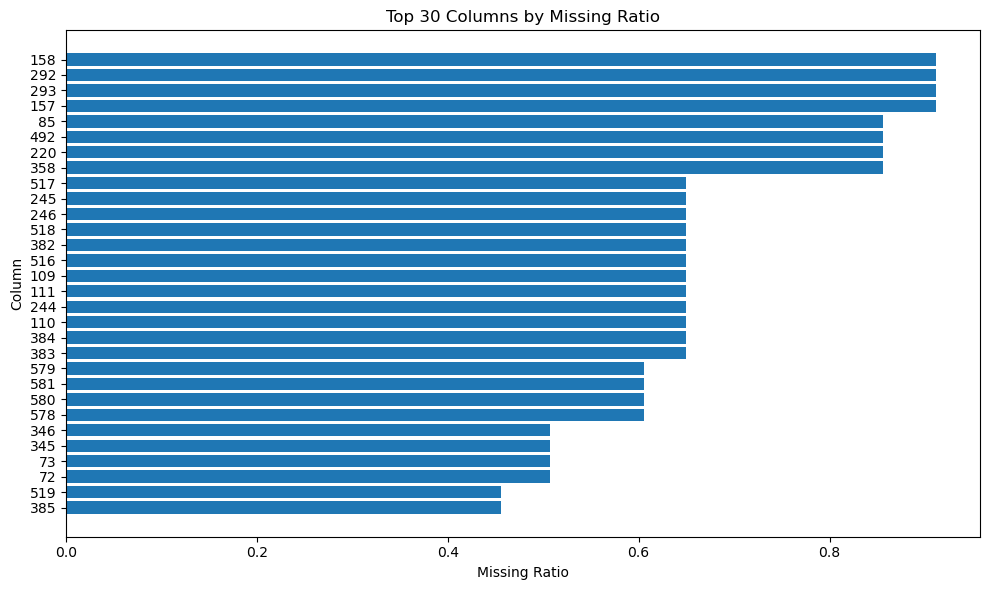

In [10]:
# === Plot: Top-N Missing Columns ===
top_n = 30
top_missing = missing_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_missing['column'].astype(str), top_missing['missing_ratio'])
plt.xlabel('Missing Ratio')
plt.ylabel('Column')
plt.title(f'Top {top_n} Columns by Missing Ratio')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Target value counts:
 Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64


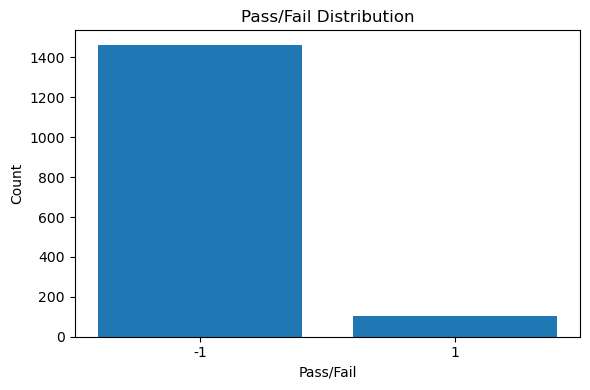

In [11]:
# === Target Distribution (Pass/Fail) ===
if target_col is not None:
    value_counts = df[target_col].value_counts(dropna=False).sort_index()
    print('Target value counts:\n', value_counts)
    
    plt.figure(figsize=(6,4))
    plt.bar(value_counts.index.astype(str), value_counts.values)
    plt.xlabel(target_col)
    plt.ylabel('Count')
    plt.title(f'{target_col} Distribution')
    plt.tight_layout()
    plt.show()
else:
    print("未偵測到目標變數欄位（如 Pass/Fail / y）。請手動設定 target_col。")


In [12]:
# === Zero-Variance Sensors ===
# 僅針對數值型欄位檢查
numeric_cols = [c for c in sensor_cols if pd.api.types.is_numeric_dtype(df[c])]
nunique = df[numeric_cols].nunique(dropna=True)
zero_var_cols = nunique[nunique <= 1].index.tolist()

print('Zero-variance columns count:', len(zero_var_cols))
print('Examples:', zero_var_cols[:20])


Zero-variance columns count: 116
Examples: ['5', '13', '42', '49', '52', '69', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229']


In [13]:
# === Summary Stats (Sensors) ===
# 只對數值型欄位做摘要
summary = df[sensor_cols].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).T
summary.head(10)


,count,mean,std,min,1%,5%,50%,95%,99%,max
0,1561.0,3014.452896,73.621787,2743.2400,2851.980000,2903.34000,3011.4900,3136.34000,3225.568000,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2272.320200,2363.44850,2499.4050,2614.56250,2717.500800,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2124.844400,2158.70000,2201.0667,2246.48890,2269.255600,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,867.302700,918.21610,1285.2144,2148.53970,3012.841948,3715.0417
4,1553.0,4.197013,56.355540,0.6815,0.753100,0.79700,1.3168,2.13772,2.525024,1114.5366
5,1553.0,100.000000,0.000000,100.0000,100.000000,100.00000,100.0000,100.00000,100.000000,100.0000
6,1553.0,101.112908,6.237214,82.1311,83.822200,89.31088,101.5122,110.54220,119.354400,129.2522
7,1558.0,0.121822,0.008961,0.0000,0.117200,0.11950,0.1224,0.12540,0.126800,0.1286
8,1565.0,1.462862,0.073897,1.1910,1.294340,1.34560,1.4616,1.58590,1.617100,1.6564
9,1565.0,-0.000841,0.015116,-0.0534,-0.034616,-0.02536,-0.0013,0.02468,0.038836,0.0749


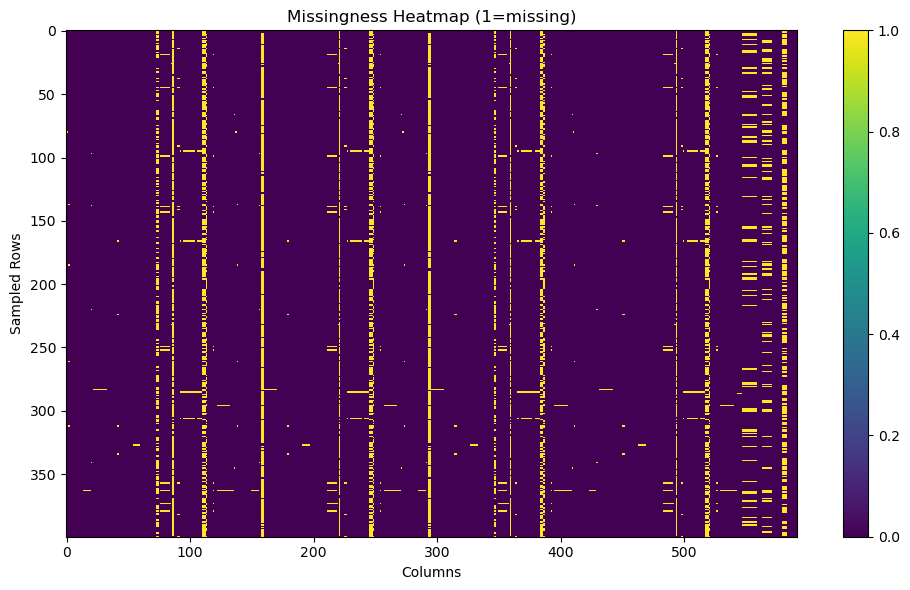

In [14]:
# === Missingness Heatmap (sample) ===
# 直接用 matplotlib.imshow 顯示缺失矩陣的一個子樣本，以避免 1567x592 過大
sample_n = min(400, len(df))
sample_df = df.sample(sample_n, random_state=42)
miss_matrix = sample_df.isna().astype(int).values

plt.figure(figsize=(10, 6))
plt.imshow(miss_matrix, aspect='auto', interpolation='nearest')
plt.xlabel('Columns')
plt.ylabel('Sampled Rows')
plt.title('Missingness Heatmap (1=missing)')
plt.colorbar()
plt.tight_layout()
plt.show()


Top-variance sensors: ['162', '161', '297', '24', '296', '23']


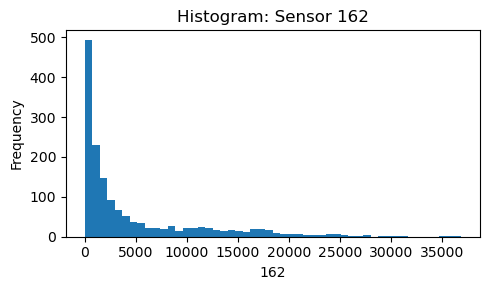

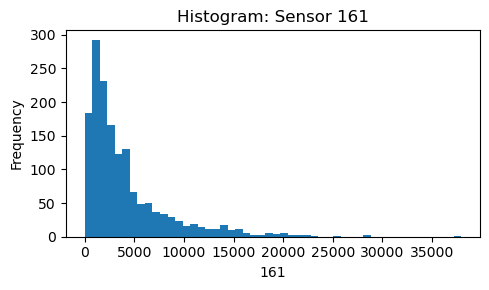

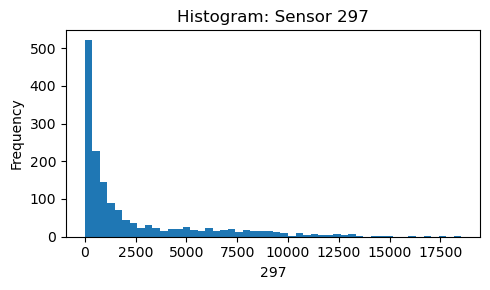

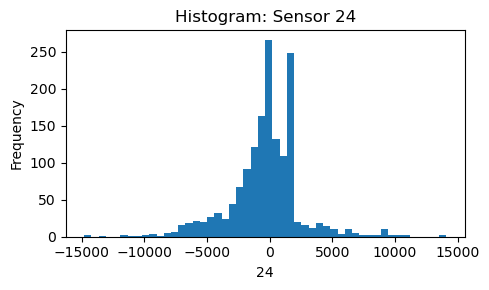

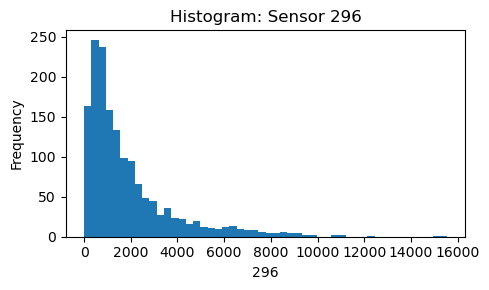

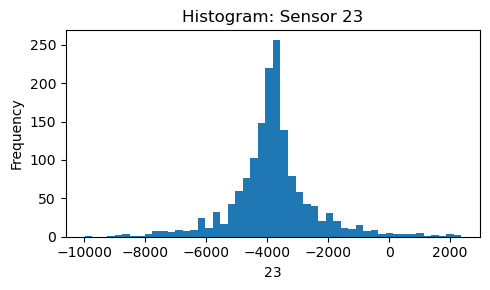

In [15]:
# === Histograms for Selected Sensors ===
# 依據變異度選出前幾個變異較大的感測器，繪製直方圖
# 先用樣本（避免在高缺失與大維度上過慢）
var_series = df[sensor_cols].var(numeric_only=True).sort_values(ascending=False)
top_k = 6
top_sensors = var_series.head(top_k).index.tolist()
print('Top-variance sensors:', top_sensors)

for c in top_sensors:
    s = df[c].dropna()
    if len(s) == 0:
        continue
    plt.figure(figsize=(5,3))
    plt.hist(s, bins=50)
    plt.xlabel(str(c))
    plt.ylabel('Frequency')
    plt.title(f'Histogram: Sensor {c}')
    plt.tight_layout()
    plt.show()


In [17]:
# === Grouped Summary by Target (if available) ===
if target_col is not None and target_col in df.columns:
    # 只顯示少量指標避免輸出過大
    grouped_mean = df.groupby(target_col)[sensor_cols].mean(numeric_only=True)
    grouped_std = df.groupby(target_col)[sensor_cols].std(numeric_only=True)
    display_cols = grouped_mean.var().sort_values(ascending=False).head(10).index.tolist()
    
    print('Top-10 sensors with largest between-group mean variance:')
    print(display_cols)
    
    print('\nGrouped MEAN (top-10 sensors):')
    display(grouped_mean[display_cols])
    
    print('\nGrouped STD (top-10 sensors):')
    display(grouped_std[display_cols])
else:
    print("未偵測到目標變數欄位，略過群組摘要。")


Top-10 sensors with largest between-group mean variance:
['161', '159', '21', '24', '158', '160', '294', '162', '296', '295']

Grouped MEAN (top-10 sensors):


,161,159,21,24,158,160,294,162,296,295
Pass/Fail,,,,,,,,,,
-1,4088.895349,862.27565,-5636.437585,-284.441518,1027.456942,541.604651,391.418291,4807.294118,1887.538118,246.059016
1,3753.941748,1172.31068,-5362.274272,-499.539641,1237.799925,750.398058,549.383908,4653.233010,1761.278333,351.508144



Grouped STD (top-10 sensors):


,161,159,21,24,158,160,294,162,296,295
Pass/Fail,,,,,,,,,,
-1,4293.509195,940.047002,593.798769,2936.246798,409.357936,549.478854,453.682314,6611.570066,1998.920539,269.842789
1,3377.785131,1438.581287,950.378454,2378.672402,322.176921,836.913053,719.578261,5693.037645,1602.810843,423.299234


In [18]:
# === Data Quality & Next Steps (Notes) ===
print("""建議的後續步驟：
1) 缺失值處理：
   - 以欄位缺失比例設定閾值（例如 >60% 直接移除）。
   - 其餘以中位數或基於分群/近鄰的方式填補（KNNImputer）。
2) 特徵過濾：
   - 移除零變異與近似零變異欄位。
   - 針對高度共線欄位進行降維（PCA）或保留具可解釋性的子集。
3) 目標不平衡：
   - 若 `Pass/Fail` 嚴重不平衡，可考慮 Stratified split、class_weight、或 SMOTE。
4) 視覺化：
   - 以 PCA/t-SNE 將高維資料降維，觀察 `Pass/Fail` 分群情形。
5) 建模前檢查：
   - 針對感測器異常值（極端值）進行截尾處理或穩健縮放（RobustScaler）。
""")

建議的後續步驟：
1) 缺失值處理：
   - 以欄位缺失比例設定閾值（例如 >60% 直接移除）。
   - 其餘以中位數或基於分群/近鄰的方式填補（KNNImputer）。
2) 特徵過濾：
   - 移除零變異與近似零變異欄位。
   - 針對高度共線欄位進行降維（PCA）或保留具可解釋性的子集。
3) 目標不平衡：
   - 若 `Pass/Fail` 嚴重不平衡，可考慮 Stratified split、class_weight、或 SMOTE。
4) 視覺化：
   - 以 PCA/t-SNE 將高維資料降維，觀察 `Pass/Fail` 分群情形。
5) 建模前檢查：
   - 針對感測器異常值（極端值）進行截尾處理或穩健縮放（RobustScaler）。

